In [1]:
import pandas as pd
import time
from datetime import datetime
import numpy as np

In [13]:
!pip install pycoingecko

In [2]:
from pycoingecko import CoinGeckoAPI
cg = CoinGeckoAPI()

In [3]:
days = len(pd.date_range(start='2017-10-01', end='2022-02-21', freq='D'))

In [4]:
days

1605

## Upbit

In [5]:
l = cg.get_exchanges_volume_chart_by_id('upbit', days)

In [6]:
len(l)

1447

In [7]:
df_upbit = pd.DataFrame(l)

In [8]:
df_upbit['timestamp'] = df_upbit[0].apply(lambda x: datetime.fromtimestamp(x / 1000))

In [9]:
df_upbit = df_upbit.set_index('timestamp')

In [10]:
df_upbit['transaction'] = df_upbit[1].apply(float)

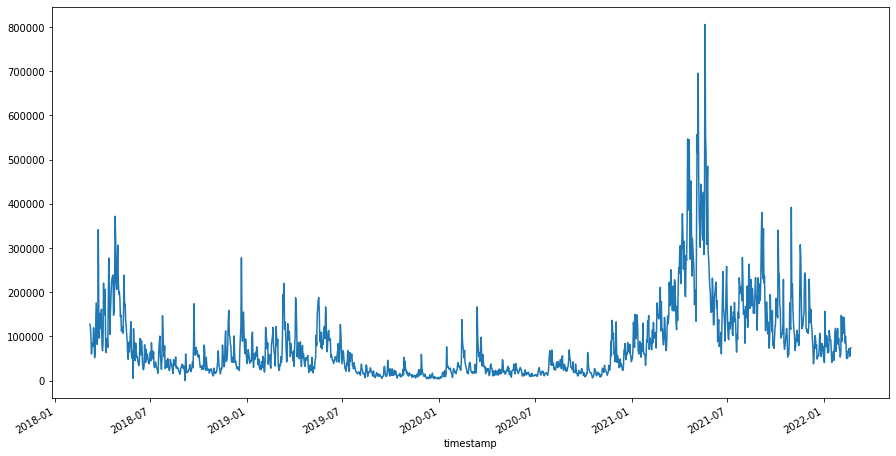

In [11]:
df_upbit.transaction.plot(figsize=(15, 8))

In [12]:
df_upbit

,0,1,transaction
timestamp,,,
2018-03-08 07:50:00,1.520495e+12,127602.434051318732027032656488384994974796119...,127602.434051
2018-03-09 07:50:00,1.520582e+12,120913.951811330727335439856143996010873900435...,120913.951811
2018-03-10 07:50:00,1.520668e+12,101746.411792949912462508706190143340046168995...,101746.411793
2018-03-11 07:50:00,1.520755e+12,60115.4085092095778344484384135800328419007977...,60115.408509
2018-03-12 07:50:00,1.520841e+12,74630.8964727805780546890136977412710283267788...,74630.896473
...,...,...,...
2022-02-17 07:50:00,1.645084e+12,65388.244669625421297121021404766430401489278617,65388.244670
2022-02-18 07:50:00,1.645171e+12,72777.759743834615969788549056235059369455326529,72777.759744
2022-02-19 07:50:00,1.645257e+12,54588.4457832165696402895834184795071394303169628,54588.445783


## Bithumb

In [13]:
l = cg.get_exchanges_volume_chart_by_id('bithumb', days)

In [14]:
len(l)

1446

In [15]:
df_bithumb = pd.DataFrame(l)

In [17]:
df_bithumb['timestamp'] = df_bithumb[0].apply(lambda x: datetime.fromtimestamp(x / 1000))

In [20]:
df_bithumb = df_bithumb.set_index('timestamp')

In [21]:
df_bithumb['transaction'] = df_bithumb[1].apply(float)

In [26]:
df_bithumb

,0,1,transaction
timestamp,,,
2018-03-08 07:50:00,1.520495e+12,82904.2829680896755151032813833940859488232895285,82904.282968
2018-03-09 07:50:00,1.520582e+12,91996.075520770377076324132630607724217371564274,91996.075521
2018-03-10 07:50:00,1.520668e+12,88181.797790833496319222996751756642475513923245,88181.797791
2018-03-11 07:50:00,1.520755e+12,52415.8431537708767062031240936956397342076987...,52415.843154
2018-03-12 07:50:00,1.520841e+12,51649.0634379346859466958763904410031632320919...,51649.063438
...,...,...,...
2022-02-17 07:50:00,1.645084e+12,21779.460751003201733936413909208504805648004,21779.460751
2022-02-18 07:50:00,1.645171e+12,20019.0110449605216247625568069388728671931,20019.011045
2022-02-19 07:50:00,1.645257e+12,15437.933032716016371075930360619041096503385,15437.933033


## Coinone

In [7]:
l = cg.get_exchanges_volume_chart_by_id('coinone', 10)

In [8]:
len(l)

240

In [10]:
df_coinone = pd.DataFrame(l)

In [11]:
df_coinone['timestamp'] = df_coinone[0].apply(lambda x: datetime.fromtimestamp(x / 1000))

In [12]:
df_coinone

,0,1,timestamp
0,1.644571e+12,5682.89932166909151773069860493074052257,2022-02-11 09:20:00
1,1.644575e+12,5631.5238702471563967419435023802714595,2022-02-11 10:20:00
2,1.644578e+12,5593.48344831089294784622705543235748138,2022-02-11 11:20:00
3,1.644582e+12,5451.33852540270159559709961370764716495,2022-02-11 12:20:00
4,1.644586e+12,5440.62088456856609462970593638135475863,2022-02-11 13:20:00
...,...,...,...
235,1.645417e+12,3835.50375159470154194619185270057410662,2022-02-21 04:20:00
236,1.645421e+12,3822.00807006710593857717627798628544456,2022-02-21 05:20:00
237,1.645424e+12,3746.02680566450605966175484542010669077,2022-02-21 06:20:00
238,1.645428e+12,3707.1347288333645457258571677762314985,2022-02-21 07:20:00


# Merge

In [22]:
df = pd.DataFrame(index=df_upbit.index)

In [23]:
df['upbit_trans'] = df_upbit['transaction']
df['bithumb_trans'] = df_bithumb['transaction']

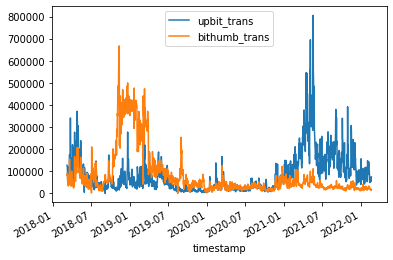

In [25]:
df.plot()

In [59]:
l = cg.get_coin_market_chart_by_id(id='bitcoin', vs_currency='usd', days=365)

In [61]:
df_price = pd.DataFrame(l)

In [63]:
df_price['timestamp'] = df_price['prices'].apply(lambda x: datetime.fromtimestamp(x[0] / 1000))

In [65]:
df_price.set_index('timestamp')

,prices,market_caps,total_volumes
timestamp,,,
2021-02-22 00:00:00,"[1613952000000, 57669.3035269179]","[1613952000000, 1075380337357.9143]","[1613952000000, 61223272210.96276]"
2021-02-23 00:00:00,"[1614038400000, 54410.85629451601]","[1614038400000, 1012091985973.4642]","[1614038400000, 101532021847.06647]"
2021-02-24 00:00:00,"[1614124800000, 48691.894831704405]","[1614124800000, 904133801444.5278]","[1614124800000, 116689607925.81473]"
2021-02-25 00:00:00,"[1614211200000, 49849.378713583144]","[1614211200000, 929081504353.552]","[1614211200000, 73140585468.96529]"
2021-02-26 00:00:00,"[1614297600000, 46992.665450048495]","[1614297600000, 875883932252.4404]","[1614297600000, 60355381275.54549]"
...,...,...,...
2022-02-17 00:00:00,"[1645056000000, 44063.28198279571]","[1645056000000, 836256083783.791]","[1645056000000, 16847003857.433496]"
2022-02-18 00:00:00,"[1645142400000, 40562.98694982819]","[1645142400000, 770096677778.6456]","[1645142400000, 22270664615.4777]"
2022-02-19 00:00:00,"[1645228800000, 40073.495362369824]","[1645228800000, 759881874201.3011]","[1645228800000, 20130002755.177864]"


In [66]:
df_price['usd/btc'] = df_price['prices'].apply(lambda x: float(x[1]))

In [71]:
df['transaction_usd'] = np.array(df['transaction']) * np.array(df_price['usd/btc'])

In [72]:
df

,0,1,transaction,transaction_usd
timestamp,,,,
2021-02-22 07:10:00,1.613978e+12,142573.442900357585211677937684762181350597032...,142573.442900,8.222111e+09
2021-02-23 07:10:00,1.614064e+12,198150.496683925643528465631109752776658460533...,198150.496684,1.078154e+10
2021-02-24 07:10:00,1.614151e+12,209526.023345965864507707919188177829945365679...,209526.023346,1.020222e+10
2021-02-25 07:10:00,1.614237e+12,111223.084655339321374621313390696116008080750...,111223.084655,5.544402e+09
2021-02-26 07:10:00,1.614323e+12,174629.177696414552000910731991422784695771698...,174629.177696,8.206291e+09
...,...,...,...,...
2022-02-17 07:10:00,1.645082e+12,65485.307085328919377599422598827431966533445302,65485.307085,2.885498e+09
2022-02-18 07:10:00,1.645168e+12,72312.1623751272643830723317419897184981764806007,72312.162375,2.933197e+09
2022-02-19 07:10:00,1.645255e+12,55447.1858241120869435598199709959183694986870758,55447.185824,2.221963e+09


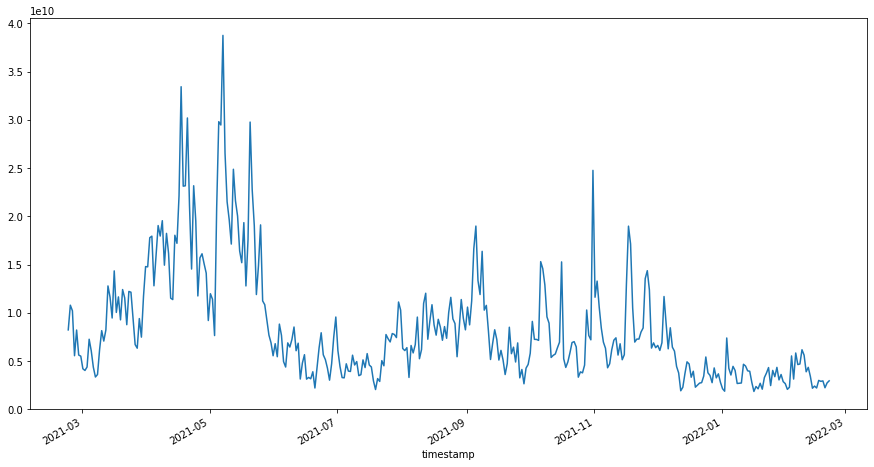

In [74]:
df.transaction_usd.plot(figsize=(15, 8))

In [31]:
df_csv = pd.read_csv('sample_data/upbit-trading-volume-1-year.csv')

In [33]:
df_csv.dtypes

snapped_at     object
volume        float64
dtype: object

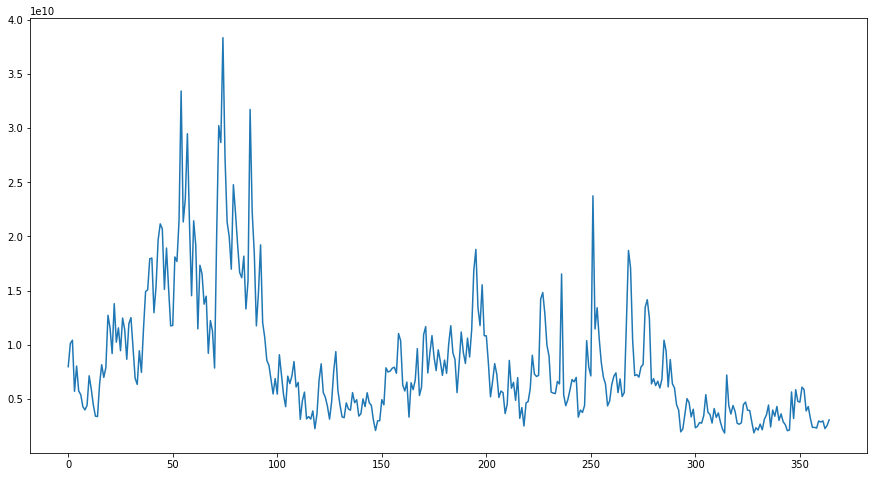

In [34]:
df_csv.volume.plot(figsize=(15, 8))